# We Rate Dogs - Data Wrangling Project


## Introduction

Data in the real world rarely comes clean. The aim of this project is to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset that is to be wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. The goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analysis and visualizations. The Twitter archive only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for detailed analysis and visualizations.


## The Data
Comprising three datasets.

#### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.


#### Additional Data via the Twitter API

Data gathered from Twitter's API to get retweet count and favorite count.


#### Image Predictions File

A table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) based on classification of dog breeds leveraging neural networks.


#### Key Points

- I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- The goal is to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning will include merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
-  Tweets beyond August 1st, 2017 will not be gathered as the image predictions for these tweets are unavailabe and there is no access to the algorithm used.

## Data Gathering

**Enhanced Twitter Archive**: File will be downloaded file using the link provided.

**Image Prediction File**: This will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv 

**Additional Data via Twitter API**: The goal is to get each tweet's retweet count and favorite ("like") count and any additional data that may be interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minbimum) tweet ID, retweet count, and favorite count.

In [1]:
pip install tweepy==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tweepy
import requests
import json
import seaborn as sns

###### Getting data from Twitter archive already downloaded

In [3]:
#Reading the CSV file
twitter_archive = pd.read_csv('/Users/ifunanya/Downloads/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Downloading data programmatically via URL

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects = True)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)


# Reading the TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Getting Additional Data via Twitter API

In [5]:
#Gathering data via Twitter using Python's Tweepy Library

consumer_key = '************'
consumer_secret = '*************'
access_token = '****************'
access_secret = '***************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                parser = tweepy.parsers.JSONParser(),
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [6]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
tweet_ids = []
# Tweets that can't be found are saved in the list below:
notweets_for_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        data = (api.get_status(tweet_id))
        list_of_tweets.append(data)
        tweet_ids.append(tweet_id)
    except Exception as e:
        notweets_for_ids.append(tweet_id)

In [7]:
print('Tweets in list:', len(list_of_tweets))
print('Tweets with IDs:', len(tweet_ids))
print('No tweets for Ids:', len(notweets_for_ids))

Tweets in list: 2323
Tweets with IDs: 2323
No tweets for Ids: 33


In [8]:
#isolating each json tweet

json_tweets = []
for each_json_tweet in list_of_tweets:
    json_tweets.append(each_json_tweet)

In [9]:
#writing into a txt file

with open('tweet_json.txt', 'w') as f:
    json.dump(json_tweets, f)

In [10]:
# Loading the Twitter API data
action_counts = pd.read_json('tweet_json.txt')
action_counts['tweet_id'] = tweet_ids
action_counts= action_counts[['tweet_id', 'favorite_count', 'retweet_count']]

In [11]:
print(action_counts.head())
print(len(action_counts))

             tweet_id  favorite_count  retweet_count
0  892420643555336193           33226           6934
1  892177421306343426           28744           5238
2  891815181378084864           21618           3450
3  891689557279858688           36206           7146
4  891327558926688256           34639           7678
2323


## Assessing Data

The focus for this section is to assess the data gathered and identify any issues that may be present. This will be done both visually and programmatically.
The aim is to identify both quality and tidiness issues.

The requirements for quality are:
- Completeness: Identify missing data
- Validity: Check that data present are valid and adequately represent their fields
- Accuracy: Asides validity, is the data correct?
- Consistency: Is it standardized across fields?

Requirements for tidiness are:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

#### Visual Assessment of Data (Looking through each of the data gathered)

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
action_counts

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33226,6934
1,892177421306343426,28744,5238
2,891815181378084864,21618,3450
3,891689557279858688,36206,7146
4,891327558926688256,34639,7678
...,...,...,...
2318,666049248165822465,88,36
2319,666044226329800704,245,114
2320,666033412701032449,99,36
2321,666029285002620928,111,39


#### Programmatic assessment of data (Utilising pandas functions and methods for assessment)

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
776,776113305656188928,NaN,NaN,2016-09-14 17:40:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He's about to get hit with a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
1184,718631497683582976,NaN,NaN,2016-04-09 02:47:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate marshmallows but this o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718631497...,10,10,None,None,None,None,None
619,796149749086875649,NaN,NaN,2016-11-09 00:37:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She just turned on the news. Off...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None
1657,683142553609318400,NaN,NaN,2016-01-02 04:27:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683142553...,9,10,Brandy,None,None,pupper,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
304,836380477523124226,NaN,NaN,2017-02-28 01:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,None,None,pupper,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
2093,670780561024270336,NaN,NaN,2015-11-29 01:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Traviss. He has no ears. Two rare dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670780561...,7,10,Traviss,None,None,None,None


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
596,679527802031484928,https://pbs.twimg.com/media/CW4q7jDWkAA2y8g.jpg,1,mailbox,0.336393,False,cannon,0.158936,False,cuirass,0.052647,False
1743,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,1,malinois,0.332897,True,Chihuahua,0.104116,True,Staffordshire_bullterrier,0.047745,True
1660,811627233043480576,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg,1,beagle,0.396280,True,Pembroke,0.049562,True,wire-haired_fox_terrier,0.046349,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
261,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True


In [21]:
action_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2323 non-null   int64
 1   favorite_count  2323 non-null   int64
 2   retweet_count   2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [22]:
action_counts.describe()

,tweet_id,favorite_count,retweet_count
count,2.323000e+03,2323.000000,2323.000000
mean,7.417021e+17,6904.225140,2434.097288
std,6.817225e+16,10696.130527,4097.171142
min,6.660209e+17,0.000000,0.000000
25%,6.780222e+17,1203.000000,491.000000
50%,7.177900e+17,2999.000000,1138.000000
75%,7.986068e+17,8443.000000,2826.500000
max,8.924206e+17,142749.000000,69885.000000


In [23]:
action_counts.sample(20)

,tweet_id,favorite_count,retweet_count
1811,675849018447167488,847,123
866,759099523532779520,13406,3776
1750,677673981332312066,2993,1332
1567,686034024800862208,2800,1026
1896,674042553264685056,625,109
47,882992080364220416,20602,3214
905,753375668877008896,7012,2111
1212,711968124745228288,7298,2077
195,852912242202992640,8098,1582
1816,675781562965868544,1436,415


##### Twitter Archive Dataset

In [24]:
twitter_archive.duplicated().sum()

0

In [25]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [27]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

##### Image Predictions Dataset

In [28]:
#Pulling an image

from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg')

In [29]:
image_predictions.duplicated().sum()

0

In [30]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

##### Action Counts Analysis

In [33]:
action_counts.duplicated().sum()

0

In [34]:
action_counts.retweet_count.mean()

2434.0972879896685

In [35]:
action_counts.favorite_count.mean()

6904.225139905295

#### Quality Issues

##### twitter_archive:

- Missing data in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Dog names: some dogs have 'None' as a name, or 'a', or 'an.'
- Dataset has retweets which will lead to duplicated data resulting in some empty columns (Columns with the the retweeted tag)
- Datatype of tweet_id is int (on all tables)
- Datatype of timestamp is an object
- Rating_numerator has values up to 1776
- Rating_denominator has values above 10
- The source column still has HTML tags

##### image_predictions:
- p1, p2 and p3 columns have invalid data
- p1, p2 and p3 columns aren't consistent: It varies between lowercase and sentence case
- Multi word breeds are represented with an underscore in columns p1, p2, p3

##### action_counts:
- Missing data in columns


#### Tidiness Issues

##### twitter_archive:

- Dogoo, Fluffer, Pupper and Puppo all relate to a variable

##### image_predictions:

- Should form one observational unit with twitter_archive

##### action_counts:

- Should form one observational unit with twitter_archive

## Cleaning Data

Includes define, code and test.

#### Define

- Copy the indepedent data sets and merge together to form one table/dataset
- Correct issues in the name column of twitter_archive
- Delete retweets
- Remove columns with missing data not needed for the analysis. These are: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- Change datatype of tweet_id from integer to string
- Change datatype of timestamp from object to datetime format
- Melt the various dog types into one column
- Remove all columns which are no longer needed
- Standardize dog ratings for consistency
- Create new breed column using data from the image prediction table

#### Code and test 1 - Copy the indepedent data sets and merge together to form one table/dataset

In [36]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
action_counts_copy = action_counts.copy()

In [37]:
twitter_weratedogs = pd.merge(pd.merge(twitter_archive_copy, image_predictions_copy, on = 'tweet_id'), action_counts_copy, on = 'tweet_id')

In [38]:
#testing 
twitter_weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33226,6934
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,28744,5238
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21618,3450
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36206,7146
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,34639,7678


In [39]:
#testing 
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2053 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2053 non-null   object 
 4   source                      2053 non-null   object 
 5   text                        2053 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2053 non-null   object 
 10  rating_numerator            2053 non-null   int64  
 11  rating_denominator          2053 non-null   int64  
 12  name                        2053 non-null   object 
 13  doggo                       2053 

#### Code and test 2 - Correct issues in the name column of twitter_archive

In [40]:
twitter_weratedogs.name = twitter_weratedogs.name.str.replace('^[a - z]+', 'None')

/var/folders/1l/vb42vw715ndd_r3d14zshrjr0000gn/T/ipykernel_1172/1088042949.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_weratedogs.name = twitter_weratedogs.name.str.replace('^[a - z]+', 'None')


In [41]:
#testing
twitter_weratedogs['name'].value_counts()

None          623
Oliver         10
Penny          10
Cooper         10
Charlie        10
             ... 
Emma            1
Luna            1
Spencer         1
Lilli           1
Christoper      1
Name: name, Length: 933, dtype: int64

#### Code and test 3 - Delete retweets

In [42]:
# the aim is to remove retweets from the dataset so that we are handling only tweeets. This will be done by dropping rows where retweet is not null
twitter_weratedogs = twitter_weratedogs[np.isnan(twitter_weratedogs.retweeted_status_id)]

In [43]:
#testing to confirm that no non-null values are left
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1983 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1983 non-null   object 
 4   source                      1983 non-null   object 
 5   text                        1983 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1983 non-null   object 
 10  rating_numerator            1983 non-null   int64  
 11  rating_denominator          1983 non-null   int64  
 12  name                        1983 non-null   object 
 13  doggo                       1983 

#### Code and test 4 - Remove columns with missing data and those not needed for the analysis. These are: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [44]:
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_weratedogs.drop(cols_to_drop, inplace = True, axis = 1)

In [45]:
#testing
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1983 non-null   int64  
 1   timestamp           1983 non-null   object 
 2   source              1983 non-null   object 
 3   text                1983 non-null   object 
 4   expanded_urls       1983 non-null   object 
 5   rating_numerator    1983 non-null   int64  
 6   rating_denominator  1983 non-null   int64  
 7   name                1983 non-null   object 
 8   doggo               1983 non-null   object 
 9   floofer             1983 non-null   object 
 10  pupper              1983 non-null   object 
 11  puppo               1983 non-null   object 
 12  jpg_url             1983 non-null   object 
 13  img_num             1983 non-null   int64  
 14  p1                  1983 non-null   object 
 15  p1_conf             1983 non-null   float64
 16  p1_dog

#### Code and test 5 - Change datatype of tweet_id from integer to string

In [46]:
twitter_weratedogs['tweet_id'] = twitter_weratedogs['tweet_id'].astype(str)

In [47]:
#testing
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1983 non-null   object 
 1   timestamp           1983 non-null   object 
 2   source              1983 non-null   object 
 3   text                1983 non-null   object 
 4   expanded_urls       1983 non-null   object 
 5   rating_numerator    1983 non-null   int64  
 6   rating_denominator  1983 non-null   int64  
 7   name                1983 non-null   object 
 8   doggo               1983 non-null   object 
 9   floofer             1983 non-null   object 
 10  pupper              1983 non-null   object 
 11  puppo               1983 non-null   object 
 12  jpg_url             1983 non-null   object 
 13  img_num             1983 non-null   int64  
 14  p1                  1983 non-null   object 
 15  p1_conf             1983 non-null   float64
 16  p1_dog

#### Code and test 6 - Change datatype of timestamp from object to datetime format

In [48]:
twitter_weratedogs['timestamp'] = twitter_weratedogs['timestamp'].str.slice(start=0, stop=-6) #to remove timezone
twitter_weratedogs['timestamp'] = pd.to_datetime(twitter_weratedogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [49]:
#testing
twitter_weratedogs.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33226,6934
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,28744,5238
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21618,3450
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36206,7146
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,34639,7678


In [50]:
twitter_weratedogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

#### Code and test 7 - Melt the various dog types into one column

In [51]:
# Extract the text from the columns into the new dog_type colunn
twitter_weratedogs['dog_type'] = twitter_weratedogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [52]:
twitter_weratedogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(20)

,dog_type,doggo,floofer,pupper,puppo
1571,NaN,None,None,None,None
131,NaN,None,None,None,None
753,doggo,doggo,None,None,None
849,NaN,None,None,None,None
1788,NaN,None,None,None,None
448,NaN,None,None,None,None
1545,NaN,None,None,None,None
1116,NaN,None,None,None,None
836,NaN,None,None,None,None
1786,NaN,None,None,None,None


In [53]:
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1983 non-null   object        
 1   timestamp           1983 non-null   datetime64[ns]
 2   source              1983 non-null   object        
 3   text                1983 non-null   object        
 4   expanded_urls       1983 non-null   object        
 5   rating_numerator    1983 non-null   int64         
 6   rating_denominator  1983 non-null   int64         
 7   name                1983 non-null   object        
 8   doggo               1983 non-null   object        
 9   floofer             1983 non-null   object        
 10  pupper              1983 non-null   object        
 11  puppo               1983 non-null   object        
 12  jpg_url             1983 non-null   object        
 13  img_num             1983 non-null   int64       

In [54]:
twitter_weratedogs.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
1323,686618349602762752,2016-01-11 18:39:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None,None,...,True,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True,3368,1229,pupper
679,764259802650378240,2016-08-13 00:38:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,None,None,...,True,malinois,0.025950,True,kelpie,0.000192,True,5524,1376,NaN
1636,674019345211760640,2015-12-08 00:15:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,https://twitter.com/dog_rates/status/674019345...,10,10,Acro,None,None,...,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True,999,263,NaN
1776,670840546554966016,2015-11-29 05:43:44,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,...,True,Lhasa,0.016017,True,guinea_pig,0.007932,False,516,165,NaN
1543,676101918813499392,2015-12-13 18:10:33,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,None,None,...,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True,2546,1042,NaN
1028,710833117892898816,2016-03-18 14:19:56,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sora. She's an Egyptian Pumpernic...,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,None,None,...,True,Cardigan,0.189712,True,German_shepherd,0.001746,True,2431,472,NaN
484,796031486298386433,2016-11-08 16:47:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's here to make your day bet...,https://twitter.com/dog_rates/status/796031486...,13,10,Daisy,None,None,...,True,Labrador_retriever,0.070140,True,doormat,0.008419,False,10095,3468,NaN
1987,667174963120574464,2015-11-19 02:58:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarence. His face says he doesn't wan...,https://twitter.com/dog_rates/status/667174963...,9,10,Clarence,None,None,...,True,Chihuahua,0.243223,True,bluetick,0.072806,True,217,69,NaN
319,822859134160621569,2017-01-21 17:31:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,...,True,Chihuahua,0.104116,True,Staffordshire_bullterrier,0.047745,True,12227,2097,NaN
1076,707059547140169728,2016-03-08 04:25:07,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cupcake. She's an Icelandic Dippe...,https://twitter.com/dog_rates/status/707059547...,11,10,Cupcake,None,None,...,True,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True,2367,617,NaN


In [55]:
twitter_weratedogs.dog_type.value_counts()

pupper     222
doggo       71
puppo       27
floofer      3
Name: dog_type, dtype: int64

#### Code and test 8 - Remove all columns which are no longer needed

In [56]:
twitter_weratedogs = twitter_weratedogs.drop(['source', 'img_num'], axis = 1)

In [57]:
#testing
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1983 non-null   object        
 1   timestamp           1983 non-null   datetime64[ns]
 2   text                1983 non-null   object        
 3   expanded_urls       1983 non-null   object        
 4   rating_numerator    1983 non-null   int64         
 5   rating_denominator  1983 non-null   int64         
 6   name                1983 non-null   object        
 7   doggo               1983 non-null   object        
 8   floofer             1983 non-null   object        
 9   pupper              1983 non-null   object        
 10  puppo               1983 non-null   object        
 11  jpg_url             1983 non-null   object        
 12  p1                  1983 non-null   object        
 13  p1_conf             1983 non-null   float64     

#### Code and test 9 - - Create new breed column using data from the image prediction table

In [58]:
twitter_weratedogs['breed'] = 'None'

for b, row in twitter_weratedogs.iterrows():

    if row.p1_dog:
        twitter_weratedogs.at[b, 'breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_weratedogs.at[b, 'breed'] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        twitter_weratedogs.at[b, 'breed'] = row.p3
    else:
        twitter_weratedogs.at[b, 'breed'] = 'None'

In [59]:
#testing
twitter_weratedogs.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,33226,6934,NaN,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,28744,5238,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,21618,3450,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,36206,7146,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,34639,7678,NaN,basset


## Storing files, analysis and visualization

In [60]:
twitter_weratedogs.to_csv('/Users/ifunanya/Downloads/twitter_archive_master.csv', encoding = 'utf-8', index = False)

For this analysis, I'll like to answer the following questions:
- Which dog breeds have the highest number of retweet count?
- Which dog breeds have the highest number of favorite count?
- Which breeds are top rated?
- How have tweets fared over time
- Which names of dogs are the most popular
- Which dog types are the most popular
- Which dog types have the highest rating
- How do retweets and favorite relate?

#### Which dog breeds have the highest number of retweet count?

In [61]:
breed_retweet_count = twitter_weratedogs.nlargest(10, 'retweet_count')[['breed', 'retweet_count']]

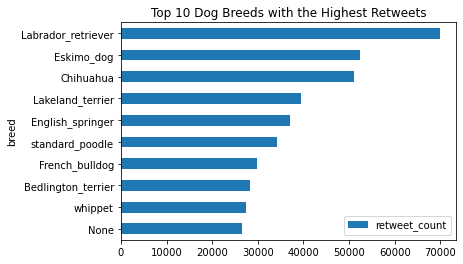

In [62]:
#plotting
breed_retweet_count.plot(x = 'breed', y = 'retweet_count', kind = 'barh', title = "Top 10 Dog Breeds with the Highest Retweets").invert_yaxis()

#### Which dog breeds have the highest number of favorite count?

In [63]:
breed_favorite_count = twitter_weratedogs.nlargest(10, 'favorite_count')[['breed', 'favorite_count']]

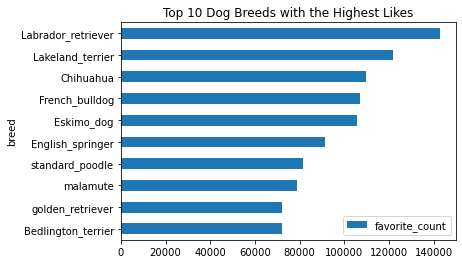

In [64]:
#plotting
breed_favorite_count.plot(x = 'breed', y = 'favorite_count', kind = 'barh', title = "Top 10 Dog Breeds with the Highest Likes").invert_yaxis()

#### Which breeds are top rated (where denominator = 10)

In [65]:
df_twitter = twitter_weratedogs[twitter_weratedogs['rating_denominator'] == 10]
df_topbreed = df_twitter.groupby('breed')['rating_numerator'].mean().sort_values(ascending = False)
print(df_topbreed.head(20))

breed
clumber                    27.000000
None                       14.746556
Bouvier_des_Flandres       13.000000
Pomeranian                 12.775000
Saluki                     12.500000
briard                     12.333333
Tibetan_mastiff            12.250000
Border_terrier             12.142857
kuvasz                     12.058824
standard_schnauzer         12.000000
silky_terrier              12.000000
Irish_setter               11.750000
Gordon_setter              11.750000
Samoyed                    11.731707
Eskimo_dog                 11.650000
chow                       11.600000
golden_retriever           11.582781
giant_schnauzer            11.500000
wire-haired_fox_terrier    11.500000
Australian_terrier         11.500000
Name: rating_numerator, dtype: float64


#### How have tweets fared over time?

In [66]:
import datetime

twitter_weratedogs.timestamp = pd.to_datetime(twitter_weratedogs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_weratedogs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.tail()

,timestamp,tweet_id
17,2017-04-30,41
18,2017-05-31,43
19,2017-06-30,43
20,2017-07-31,49
21,2017-08-31,2


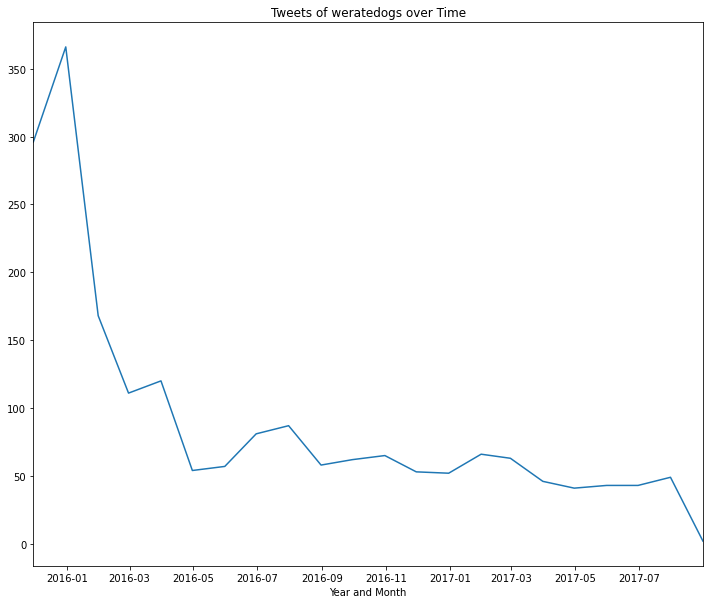

In [67]:
# Plotting tweets over time

plt.figure(figsize=(12, 10))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 31)]) 

plt.xlabel('Year and Month')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('Tweets of weratedogs over Time');

#### Which dog names are the most popular?

In [68]:
twitter_weratedogs['name'].value_counts()[1:10]

Cooper     10
Charlie    10
Oliver     10
Lucy        9
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        7
Name: name, dtype: int64

#### Which dog types are the most popular

In [69]:
twitter_weratedogs['dog_type'].value_counts()

pupper     222
doggo       71
puppo       27
floofer      3
Name: dog_type, dtype: int64

#### Which dog types have the highest rating?

In [70]:
df_twitter = twitter_weratedogs[twitter_weratedogs['rating_denominator'] == 10]
df_toptype = df_twitter.groupby('dog_type')['rating_numerator'].mean().sort_values(ascending = False)
print(df_toptype.head())

dog_type
floofer    12.666667
puppo      12.111111
doggo      11.614286
pupper     10.629630
Name: rating_numerator, dtype: float64


#### How do retweets and favorite relate?

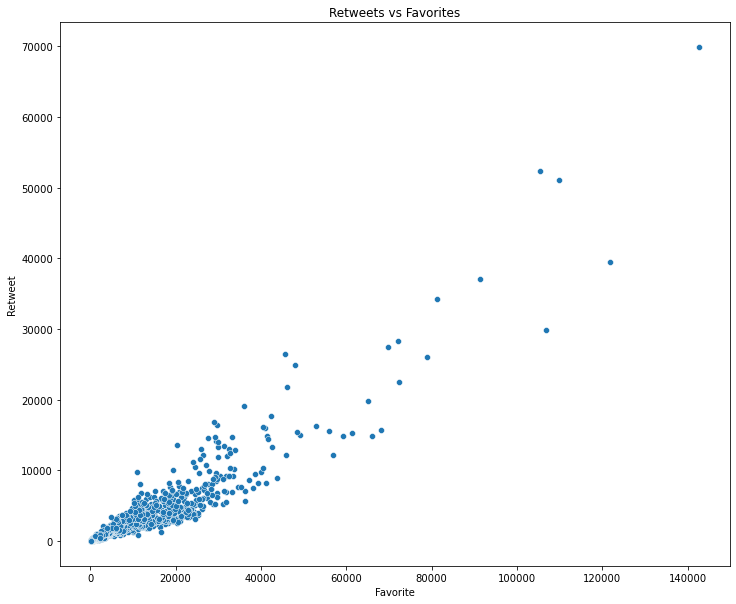

In [71]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = twitter_weratedogs,x = 'favorite_count',y = 'retweet_count')
plt.title('Retweets vs Favorites') #title
plt.xlabel('Favorite') #x label
plt.ylabel('Retweet') #y label
plt.show()

Retweets and favorites (likes) have a direct relationship.

### References

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://www.tutorialsteacher.com/python/python-read-write-file#:~:text=To%20open%20a%20file%20in,files%20are%20not%20human%2Dreadable.
- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
- Pandas documentation
- https://docs.python.org/3/library/datetime.html
- https://ipython.org/ipython-doc/3/api/generated/IPython.display.html